<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_4/TidyTuesday_Kenya_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 side by side maps. Showing total population, proportion of population that farms, and avg household size. Work in progress...

In [ ]:
!pip install geopandas

In [68]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [128]:
df_gender = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-19/gender.csv')
df_crops = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-19/crops.csv')
df_households = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-19/households.csv')
df_kenya_counties = gpd.read_file('/content/County.shp')

# Wrangle

In [131]:
#######################
## CLEAN COLUMN NAMES##
#######################

df_gender.columns = df_gender.columns.str.lower()

df_crops.columns = df_crops.columns.str.lower().str.replace(' ', '_')
df_crops = df_crops.rename(columns = {'subcounty':'county'})

df_households.columns = df_households.columns.str.lower()
df_households = df_households.rename(columns = {'numberofhouseholds':'number_of_households',
                                                'averagehouseholdsize':'average_household_size'})

df_kenya_counties.columns = df_kenya_counties.columns.str.lower()

##############################
## STANDARDIZE COUNTY NAMES ##
##############################

# Base all county names on `df_kenya_counties`
# Can find the counties that don't match the master using the following line
# [x for x in df_to_clean['county'].unique() if x not in df_kenya_counties['county'].unique()]

# Clean df_gender
df_gender['county'] = df_gender['county'].replace({'Taita/Taveta':'Taita Taveta',
                                                    'Tharaka-Nithi':'Tharaka',
                                                    'Elgeyo/Marakwet':'Keiyo-Marakwet',
                                                    'Nairobi City':'Nairobi'})

df_gender = df_gender[df_gender['county'] != 'Total']

# Clean df_crops
df_crops['county'] = df_crops['county'].str.capitalize()

df_crops['county'] = df_crops['county'].replace({'Tana river':'Tana River',
                                                 'Taita/taveta':'Taita Taveta',
                                                 'Tharaka-nithi':'Tharaka',
                                                 'West pokot':'West Pokot',
                                                 'Trans nzoia':'Trans Nzoia',
                                                 'Uasin gishu':'Uasin Gishu',
                                                 'Elgeyo/marakwet':'Keiyo-Marakwet',
                                                 'Nairobi City':'Nairobi',
                                                 'Homa bay':'Homa Bay'})

df_crops = df_crops[df_crops['county'] != 'Kenya']

# Clean df_households
df_households['county'] = df_households['county'].str.replace(' ', '')

df_households['county'] = df_households['county'].replace({'TanaRiver':'Tana River',
                                                           'Taita/Taveta':'Taita Taveta',
                                                           'Tharaka-Nithi':'Tharaka',
                                                           'WestPokot':'West Pokot',
                                                           'TransNzoia':'Trans Nzoia',
                                                           'UasinGishu':'Uasin Gishu',
                                                           'Elgeyo/Marakwet':'Keiyo-Marakwet',
                                                           'NairobiCity':'Nairobi',
                                                          'HomaBay': 'Homa Bay'})

df_households = df_households[df_households['county'] != 'Kenya']

############################
## MERGE ALL DFS TOGETHER ##
############################

# Remove some excess columns before the merge
df_households_dropped = df_households.drop(columns = 'population')

df_complete_data = df_kenya_counties.merge(df_households_dropped, on = 'county', how = 'inner')
df_complete_data = df_complete_data.merge(df_crops, on = 'county', how = 'inner')
df_complete_data = df_complete_data.merge(df_gender, on = 'county', how = 'left')

#######################
## CALCULATED FIELDS ##
#######################

# What prop of population is farming?
df_complete_data['prop_farming'] = df_complete_data['farming'] / df_complete_data['total']

# Inspect
df_complete_data.head()

,objectid,area,perimeter,county3_,county3_id,county,shape_leng,shape_area,geometry,number_of_households,average_household_size,farming,tea,coffee,avocado,citrus,mango,coconut,macadamia,cashew_nut,khat_(miraa),male,female,intersex,total,prop_farming
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...",164519,5.6,61209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478087,448868,21,926976,0.066031
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...",77495,5.8,39167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243548,216219,18,459785,0.085185
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ...",125763,6.9,62639,NaN,NaN,NaN,NaN,2685.0,NaN,NaN,NaN,NaN,434976,432444,37,867457,0.072210
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ...",127932,6.1,63433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415374,365840,49,781263,0.081193
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ...",116182,5.3,89828,NaN,1026.0,7535.0,1173.0,4426.0,NaN,NaN,NaN,NaN,307013,314213,15,621241,0.144594


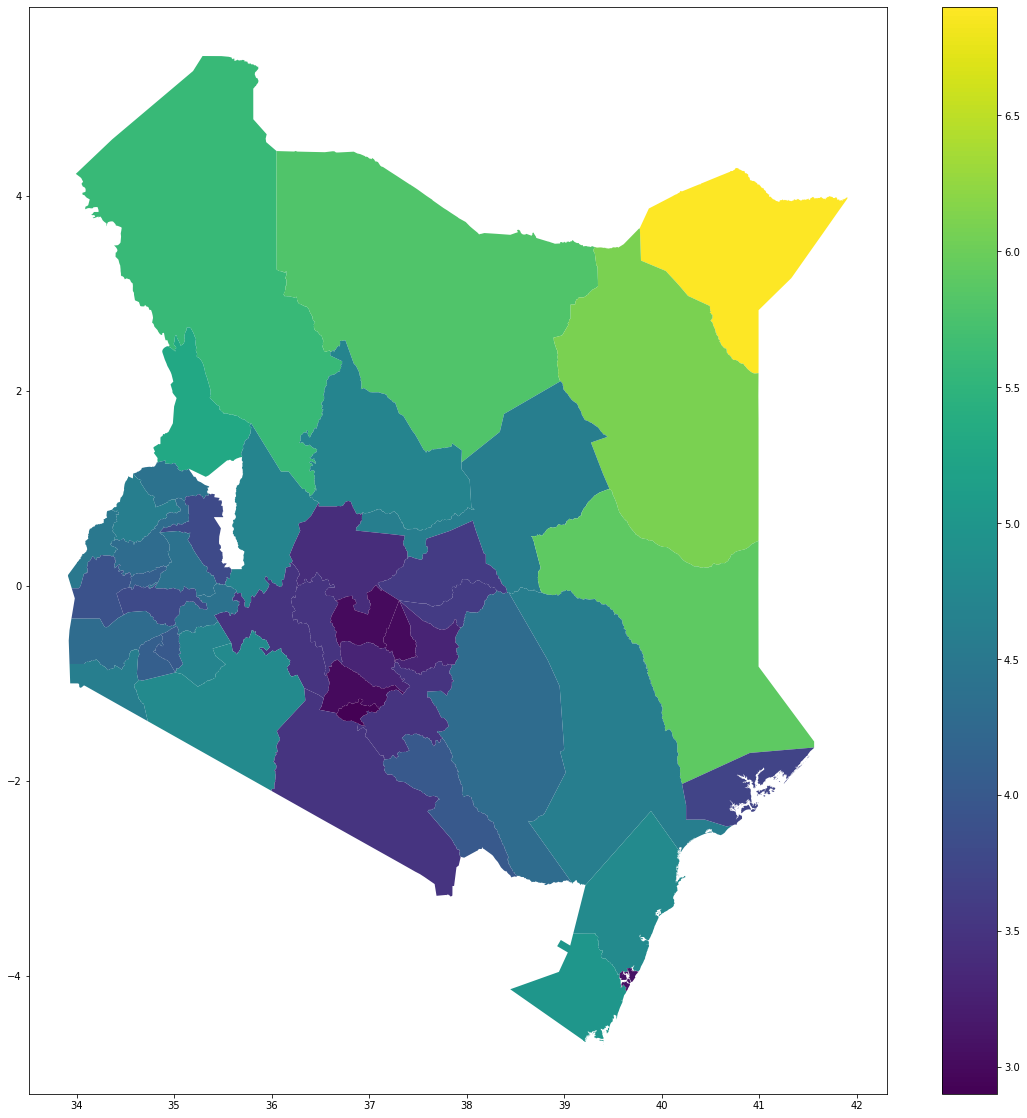

In [134]:
# For reference: https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize = (20,20))
df_complete_data.plot(column = 'average_household_size', legend = True, ax = ax)